In [14]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm
np.random.seed(12345678)

In [15]:
sigma = 0.2
S0=100
r=0.05
T=1/12
K=100

1.Define functions

In [16]:
#Simulate stock price with Brownian Motion 
def SimulatePrice_BM(paths, steps, T):
    np.random.seed(12345678)
    SML_optionprice=[]
    for j in range(paths):
        S=S0
        SML_singlepath=[]
        for i in range(steps+1):
            deltaT = T/steps
            x = np.random.randn(1)[0]
            w=x*np.sqrt(deltaT)
            SML_singlepath.append(S)
            S=S*np.exp((r-1/2*sigma**2)*deltaT+sigma*w)
        SML_optionprice.append(SML_singlepath)
    return SML_optionprice


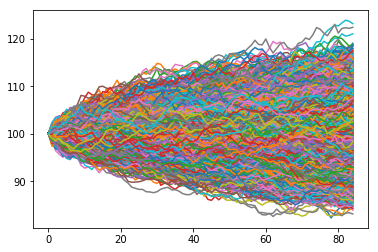

In [17]:
def plot(paths, steps, T):
    x=np.linspace(0,steps,steps+1)
    p=SimulatePrice_BM(paths, steps, T)
    for i in p[:paths]:
        plt.plot(x,i)   
plot(5000, 84, 1/12)


In [5]:
#Define Phi and Psi
def phi(St,K,r,sigma,T,t):
    d1=(np.log(St/K)+(r+1/2*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return norm.cdf(d1)

def psi(St,K,r,sigma,T,t):
    d2=(np.log(St/K)+(r-1/2*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))  
    return -K*np.exp(-r*(T-t))*norm.cdf(d2)

In [6]:
#Define Dynamic Hedging Strategy
def DHS(St,K,r,sigma,T,t):
    return phi(St,K,r,sigma,T,t)*St2-psiBond(St,K,r,sigma,T,t)

#Define Hedging Error
def HedgingError(paths, steps, T):
    HedgingError_list=[]
    St_list=SimulatePrice_BM(paths, steps, T)
    for s in St_list:
        #First the Dynamic Hedging Strategy's self-error
        Self_Error=0
        for i in range(steps):      
            Error_stock=(phi(s[i+1],K,r,sigma,T,(i+1)/steps*T)-phi(s[i],K,r,sigma,T,i/steps*T))*s[i+1]
            Error_bond =psi(s[i+1],K,r,sigma,T,(i+1)/steps*T)-psi(s[i],K,r,sigma,T,i/steps*T)*np.exp(r*T/steps)
            Self_Error+=(Error_stock+Error_bond)*np.exp(r*T*((steps-(i+1))/steps))
         #Second the Dynamic Hedging Strategy and max{St-K,0}  
        HE=phi(s[-2],K,r,sigma,T,(steps-1)/steps*T)*s[-1]+psi(s[-2],K,r,sigma,T,(steps-1)/steps*T)*(np.exp(r*T/steps))-np.maximum(0,s[-1]-K)
        Error=Self_Error+HE   
        HedgingError_list.append(Error)
    return HedgingError_list

2.Collect error

In [7]:
Error_list21=HedgingError(50000, 21, 1/12)

/Users/jeowcj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jeowcj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [8]:
Error_list84=HedgingError(50000, 84, 1/12)

/Users/jeowcj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jeowcj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


3.Store the data

In [9]:
error_data=pd.DataFrame({'21':Error_list21,'84':Error_list84})
error_data.to_csv('Error_data.csv')

4.Read the data

In [10]:
Error=pd.read_csv('Error_data.csv')

5.Histograms for the final profit/loss

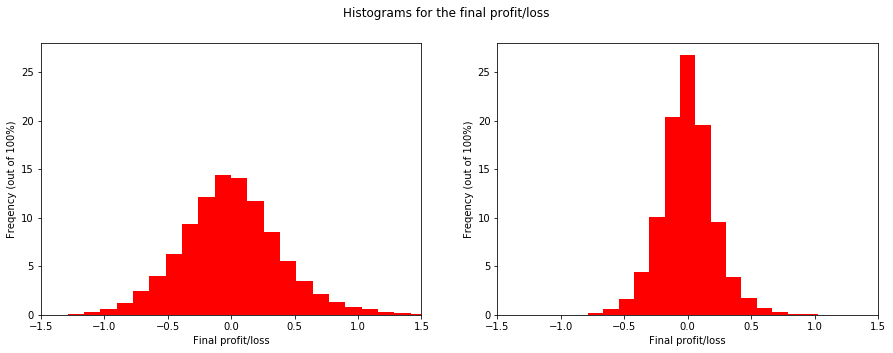

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [11]:
weight=np.ones(50000,)/50000*100
fig=plt.figure(1,figsize=[15,5])
plt.subplot(1, 2, 1)
plt.ylim(0,28)
plt.xlim(-1.5,1.5)
plt.hist(Error['21'],bins=30,color='r',weights=weight)
plt.ylabel(r'Freqency (out of 100%)')
plt.xlabel('Final profit/loss')

plt.subplot(1, 2, 2)
plt.ylim(0,28)
plt.xlim(-1.5,1.5)
plt.hist(Error['84'],bins=20,color='r',weights=weight)
plt.ylabel(r'Freqency (out of 100%)')
plt.xlabel('Final profit/loss')

plt.suptitle('Histograms for the final profit/loss')
plt.show()
plt.savefig

In [12]:
print('Mean of 21 steps: %0.4f'%np.mean(Error['21']))
print('Standard deviation of 21 steps: %0.4f'%np.std(Error['21'],ddof=1))

Mean of 21 steps: 0.0009
Standard deviation of 21 steps: 0.3973


In [13]:
print('Mean of 84 steps: %0.4f'%np.mean(Error['84']))
print('Standard deviation of 84 steps: %0.4f'%np.std(Error['84']))

Mean of 84 steps: 0.0005
Standard deviation of 84 steps: 0.2107
